The molecule inserted looks like this:


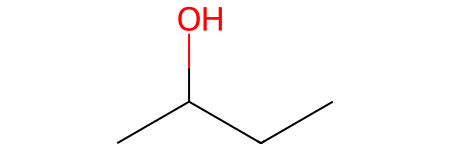

--------------------------------------
--------------------------------------
Grignard disconnection available
--------------------------------------
Option 1
Reactant 1


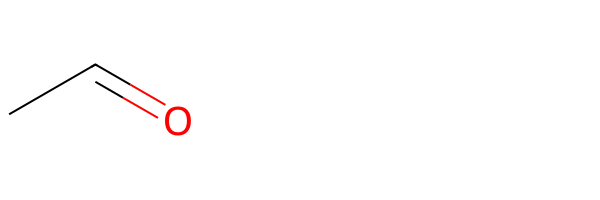

Reactant 2


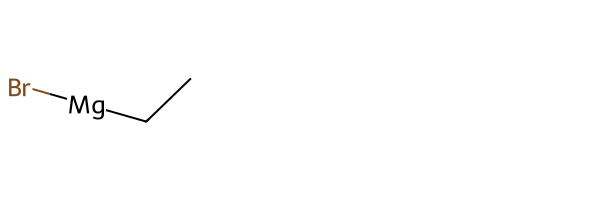

--------------------------------------
Option 2
Reactant 1


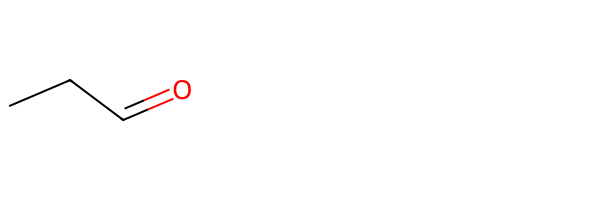

Reactant 2


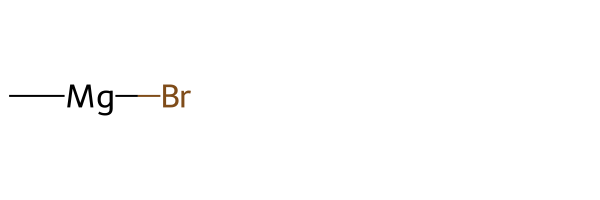

--------------------------------------
--------------------------------------
Solvent: THF
--------------------------------------


In [6]:
from rdkit import Chem
from itertools import chain
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

def unique_list_reactants (reactants_tuple: tuple) -> float:
    '''
    A tuple of tuples, containing the reactants (as Mol objects) needed to form the target molecule is received.
    This function returns a list of unique lists of the reactants (as Mol objects),
    accounting for the symmetry of the molecule.
    '''
    reactants_list = []
    for r in reactants_tuple:   #The tuple of tuples is transformed into a list of lists
        rxn_site = []           #of reactants (as String objects, using SMILES)
        for molecule in r:
            rxn_site.append(Chem.MolToSmiles(molecule))
        reactants_list.append(rxn_site)
    reactants_set = {tuple(r) for r in reactants_list} #The list is transformed in a set of tuples, to have unique elements
    reactants_list_unique = [list(r) for r in reactants_set] #The set of tuples is trnasformed into a list of unique lists
    reactants_unique_mol = []
    for r in reactants_list_unique: #Here, the list of unique list of reactants (as Mol objects) is created
        mols = []
        for smiles in r:
            mols.append(Chem.MolFromSmiles(smiles))
        reactants_unique_mol.append(mols)
    return reactants_unique_mol
    
def C_S_disconnection (mol: Chem.rdchem.Mol) ->int:
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'  " )
    '''
    The function receives a mol object and verrifes if a C(sp3 hybridized)-S bond is present
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and a thiol in the presence of potassium carbonate are displayed and 1 is returned
    If the sulfur atom is bonded to two C(sp3 hybridized) atoms, 
    there are two possible disconnections for each S atom.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the bond is not present, the function returns 0.
    
    '''
    
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[^3][S]')): 
        print (f"C(sp3)-S disconection available")
        print (f"--------------------------------------")
        iodine_smiles = 'I'
        potassium_carbonate_smiles ='C(=O)([O-])[O-].[K+].[K+]'
        iodine = Chem.MolFromSmiles(iodine_smiles)
        potassium_carbonate = Chem.MolFromSmiles(potassium_carbonate_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^3:1][S:2].[I:3]>>[C:1][I:3].[S:2]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,iodine )))       #to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], potassium_carbonate]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        return 1
    return 0
    
def ester_disconnection (mol: Chem.rdchem.Mol) ->int:

    if mol.HasSubstructMatch(Chem.MolFromSmarts('[^2](=[O])[O][C]')): #Verifies if an ester is present 
        print (f"Ester disconnection available")
        print (f"--------------------------------------")
        proton_smiles = '[H+]'
        proton = Chem.MolFromSmiles(proton_smiles)
        hydroxyl_smile = 'O'
        hydroxyl = Chem.MolFromSmiles(hydroxyl_smile)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[O:3][C:4].[O:5]>>[C^2:1](=[O:2])[O:5].[O:3][C:4]') #Searches for the ester and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol, hydroxyl))) #reactants to make the ester in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Prints the reactants and the catalyst
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            catalyst = [proton]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Catalyst")
            display(Draw.MolsToGridImage(catalyst))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def acyl_chloride_disconnection (mol: Chem.rdchem.Mol) ->int:

    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2](=[O])[Cl]')): #Verifies if the C(sp2 hybridized)=O(Cl) is present
        print (f"Acyl chloride disconnection available")
        print (f"--------------------------------------")
        carbonyl_smiles = 'O'
        Chloro_smiles='[Cl]'
        SOCl2_smiles ='Cl[S](Cl)=O'
        carbonyl = Chem.MolFromSmiles(carbonyl_smiles)
        Chloro = Chem.MolFromSmiles(Chloro_smiles)
        SOCl2 = Chem.MolFromSmiles(SOCl2_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[Cl:3].[O:4]>>[C^2:1](=[O:2])[O:4].[Cl:3]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,SOCl2 )))#to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [SOCl2]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def amine_disconnection (mol: Chem.rdchem.Mol) ->int:

     if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][N]')): #Verifies if the C(sp3 hybridized)-N is present
        print (f"Amine disconnection available")
        print (f"--------------------------------------")
        carbonyl_smiles = 'O'
        Chloro_smiles='[Cl]'
        LiAlH4_smiles ='C(=O)([O-])[O-].[K+].[K+]'
        carbonyl = Chem.MolFromSmiles(carbonyl_smiles)
        Chloro = Chem.MolFromSmiles(Chloro_smiles)
        LiAlH4 = Chem.MolFromSmiles(LiAlH4_smiles)
        rxn = AllChem.ReactionFromSmarts('[N:1][C^3:2].[Cl:3][O:4]>>[N:1].[C^2:2](=[O:4])[Cl:3]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,LiAlH4 )))#to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], LiAlH4]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        print (f"This product needs to be reduced using LiAlH4" #The molecule obtained form the reactants is an intermediate that needs to be reduced
               f" in order to obtain the target molecule")
        print (f"--------------------------------------")
        return 1
     return 0

def epoxyde_disconnection (mol: Chem.rdchem.Mol) ->int:

    if mol.HasSubstructMatch(Chem.MolFromSmarts('[O][C^3][C^3][N]')):
        print (f"Epoxyde disconnection available")
        print (f"--------------------------------------")
        NH3_smiles = 'N'
        NaNH2_smiles='[NH2-].[Na+]'
        NH3 = Chem.MolFromSmiles(NH3_smiles)
        NaNH2 = Chem.MolFromSmiles(NaNH2_smiles)
        rxn = AllChem.ReactionFromSmarts('[O:1][C^3:2][C^3:3][N:4]>>[O:1]1[C^3:2][C^3:3]1.[N:4]') #Breaks bond and creates epoxyde
        reactants = unique_list_reactants(rxn.RunReactants((mol)))#to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        print (f"This product needs NH3(l) and [NH2-].[Na+] to realise the reaction"
               f" in order to obtain the target molecule")
        print (f"--------------------------------------")
        return 1
    return 0

def grignard_disconnection (mol: Chem.rdchem.Mol) ->int:
    
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3]([O])[C^3]')): #Verifies if the C(sp3 hybridized)-O is present
        print (f"Grignard disconnection available")
        print (f"--------------------------------------")
        Mg_smiles='[Mg]'
        Br_smiles='[Br]'
        O_smiles='O'
        THF_smiles='C1CCOC1'
        Mg = Chem.MolFromSmiles(Mg_smiles)
        Br = Chem.MolFromSmiles(Br_smiles)
        O = Chem.MolFromSmiles(O_smiles)
        THF = Chem.MolFromSmiles(THF_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^3:1]([O:2])[C^3:3].[Mg:4].[Br:5]>>[C^2:1](=[O:2]).[C^3:3]([Mg:4][Br:5])') #creates carbonyl and reactant
        reactants = unique_list_reactants(rxn.RunReactants((mol,Mg,Br))) #to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-O bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        print (f"Solvent: THF")
        print (f"--------------------------------------")
        return 1
    return 0


def disconnections (mol_smiles: str):
    '''
    This function takes a SMILE of a molecule and
    displays all the known disconnections.
    '''
    mol = Chem.MolFromSmiles(mol_smiles) #Transform SMILE in mol object
    print (f"The molecule inserted looks like this:")
    display(mol)
    print (f"--------------------------------------")
    print (f"--------------------------------------")
    sum = 0 #Parameter that keeps track of the number of the types of disconnections found in the molecule
    known_disc = [C_S_disconnection, ester_disconnection, acyl_chloride_disconnection, amine_disconnection, epoxyde_disconnection, grignard_disconnection]
    for disc in known_disc:
        sum += disc(mol)
    if not sum: #In case no disconnection was found
        print(f"The molecule contains no known disconnections")




def main ():
    mol_smiles = 'CC(O)CC'
    disconnections (mol_smiles)

if __name__ == '__main__':
    main()




In [1]:
import requests

### molecule name --> smiles configuration
def smiles(molecule_name):
    url = f"https://cactus.nci.nih.gov/chemical/structure/{molecule_name}/smiles"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    else:
        return None

smiles('trimethylamine')

'CN(C)C'